In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import streamlit as st


In [11]:
test = pd.read_csv('steam_top_games_03-08-2025_00-29-31.csv',converters={'Genres': pd.eval,'Tags': pd.eval})
test

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count
0,1.0,Counter-Strike 2,805208,1783434,730,736244933,"[Action, Free To Play]","Aug 21, 2012",4582.0,"[FPS, Shooter, Multiplayer, Competitive, Actio...",8.0,95409.0,8.0,8624155.0
1,2.0,Monster Hunter Wilds,684348,1179869,2246340,56877971,"[Action, Adventure, RPG]","Feb 27, 2025",9.0,"[Hunting, Action, Multiplayer, Online Co-Op, C...",5.0,82306.0,5.0,82306.0
2,3.0,Dota 2,312549,708043,570,308480126,"[Action, Strategy, Free To Play]","Jul 9, 2013",4260.0,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",8.0,29394.0,8.0,2450734.0
3,4.0,Marvel Rivals,258299,437272,2767030,154182219,"[Action, Free To Play]","Dec 5, 2024",93.0,"[Free to Play, Multiplayer, Hero Shooter, Thir...",6.0,39560.0,8.0,239518.0
4,5.0,PUBG: BATTLEGROUNDS,255440,818843,578080,234287784,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2634.0,"[Survival, Shooter, Battle Royale, Multiplayer...",5.0,16708.0,5.0,2511999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171.0,EA SPORTS FC™ 24,5997,11590,2195250,4824629,"[Simulation, Sports]","Sep 28, 2023",527.0,"[Football (Soccer), Sports, Controller, Multip...",6.0,672.0,5.0,91662.0
171,172.0,Persona 5 Royal,5935,14854,1687950,4775493,[RPG],"Oct 20, 2022",870.0,"[JRPG, Story Rich, Turn-Based Combat, Great So...",9.0,1665.0,9.0,64815.0
172,173.0,Assassin's Creed Odyssey,5906,9996,812140,3464273,"[Action, Adventure, RPG]","Oct 5, 2018",2346.0,"[Open World, RPG, Singleplayer, Historical, Ac...",8.0,1334.0,8.0,153212.0
173,174.0,Halo: The Master Chief Collection,5742,8128,976730,2724164,[Action],"Dec 3, 2019",1922.0,"[Great Soundtrack, FPS, Classic, Multiplayer, ...",8.0,1251.0,8.0,217215.0


In [9]:
games = pd.read_csv('steam_top_games_feb13.csv', converters={'Genres': pd.eval})
games_march = pd.read_csv('steam_top_games_march_5_25.csv', converters={'Genres': pd.eval})

In [10]:
games.head()

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release
0,1.0,Counter-Strike 2,589411,1599759,730,671649980,"[Action, Free To Play]","Aug 21, 2012",4559.0
1,2.0,Marvel Rivals,296620,496193,2767030,194874053,"[Action, Free To Play]","Dec 5, 2024",70.0
2,3.0,Dota 2,271976,714888,570,313409594,"[Action, Strategy, Free To Play]","Jul 9, 2013",4237.0
3,4.0,PUBG: BATTLEGROUNDS,109129,786821,578080,213853616,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2611.0
4,5.0,Kingdom Come: Deliverance II,106607,255607,1771300,28754533,"[Action, Adventure, RPG]","Feb 4, 2025",9.0


In [11]:
print("Feb 5th:",len(games))
print("March 5th:",len(games_march))

Feb 5th: 175
March 5th: 175


In [15]:
diff_genres = games['Genres'].explode().value_counts()
diff_genres

Genres
Action                   105
Adventure                 66
RPG                       62
Simulation                56
Indie                     53
Free To Play              42
Strategy                  41
Massively Multiplayer     31
Casual                    26
Early Access              19
Sports                    10
Utilities                  7
Animation & Modeling       6
Design & Illustration      5
Racing                     5
Video Production           3
Photo Editing              2
Game Development           2
Education                  2
None                       1
Audio Production           1
Software Training          1
Name: count, dtype: int64

In [12]:
march_diff_genres = games_march['Genres'].explode().value_counts()
march_diff_genres

Genres
Action                   100
Adventure                 63
RPG                       58
Simulation                58
Indie                     52
Strategy                  44
Free To Play              41
Massively Multiplayer     31
Casual                    24
Early Access              21
Sports                    10
Utilities                  7
Animation & Modeling       6
Design & Illustration      5
Racing                     5
Video Production           3
Photo Editing              2
Education                  2
Game Development           2
None                       1
Audio Production           1
Software Training          1
Name: count, dtype: int64

In [22]:
GenreCounts = pd.DataFrame({'February Data': diff_genres, 'March Data': march_diff_genres}).fillna(0).reset_index()

GenreCounts

,Genres,February Data,March Data
0,Action,105,100
1,Adventure,66,63
2,Animation & Modeling,6,6
3,Audio Production,1,1
4,Casual,26,24
5,Design & Illustration,5,5
6,Early Access,19,21
7,Education,2,2
8,Free To Play,42,41
9,Game Development,2,2


In [35]:
GenreCounts.to_csv('GenreCounts.csv', index=False)

In [13]:
print(type(march_diff_genres))

<class 'pandas.core.series.Series'>


In [6]:
for key in diff_genres.keys():
    print(key)

Action
Adventure
RPG
Simulation
Indie
Free To Play
Strategy
Massively Multiplayer
Casual
Early Access
Sports
Utilities
Animation & Modeling
Design & Illustration
Racing
Video Production
Photo Editing
Game Development
Education
None
Audio Production
Software Training


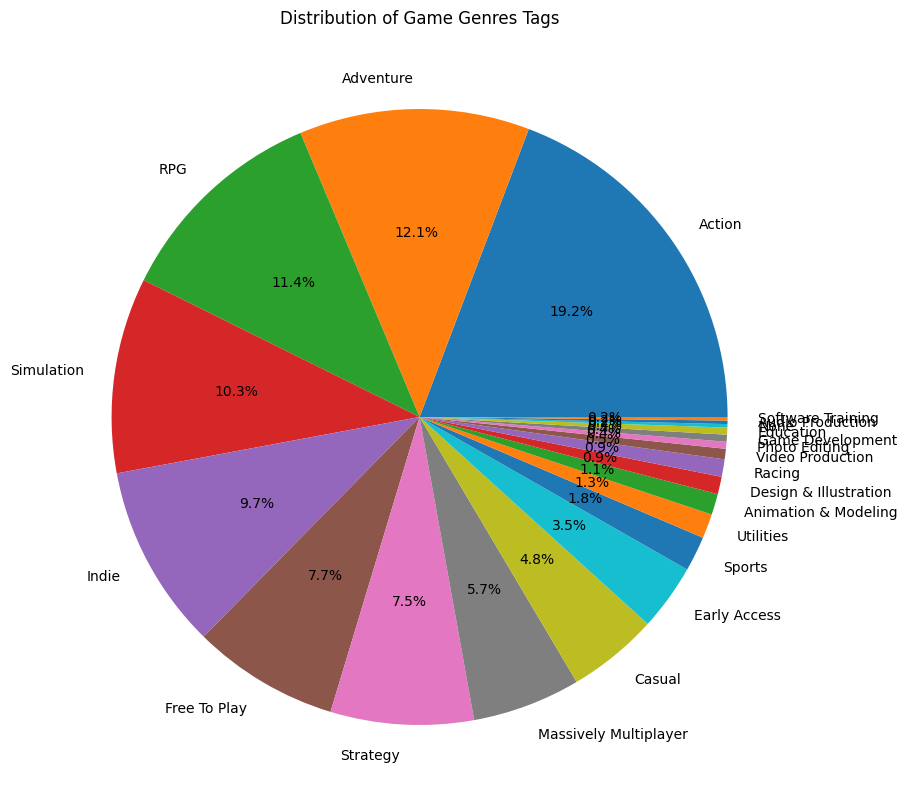

In [8]:
diff_genres.plot.pie(y='count', autopct='%1.1f%%', figsize=(10, 10), title='Distribution of Game Genres Tags')
plt.ylabel('')  # Hide the y-label
plt.show()

In [23]:
genre_player_counts = {}

for genre,playercounts in zip(games['Genres'], games['Current']):
    for g in genre:
        if g not in genre_player_counts:
            genre_player_counts[g] = []
        genre_player_counts[g].append(playercounts)

avg_players_per_genre = {genre: np.mean(playercounts) for genre, playercounts in genre_player_counts.items()}
avg_players_per_genre

{'Action': np.float64(31938.114285714284),
 'Free To Play': np.float64(49909.119047619046),
 'Strategy': np.float64(24303.19512195122),
 'Adventure': np.float64(24285.303030303032),
 'Massively Multiplayer': np.float64(23673.548387096773),
 'RPG': np.float64(19328.887096774193),
 'Indie': np.float64(17119.905660377357),
 'Casual': np.float64(17585.384615384617),
 'Simulation': np.float64(16195.5),
 'Early Access': np.float64(19191.0),
 'Animation & Modeling': np.float64(20642.0),
 'Design & Illustration': np.float64(22950.2),
 'Photo Editing': np.float64(48623.0),
 'Utilities': np.float64(19094.14285714286),
 'Education': np.float64(24144.0),
 'Game Development': np.float64(23650.0),
 'Racing': np.float64(18438.8),
 'Sports': np.float64(17437.6),
 'None': np.float64(17705.0),
 'Audio Production': np.float64(10760.0),
 'Video Production': np.float64(8231.333333333334),
 'Software Training': np.float64(5754.0)}

In [22]:
genre_player_hours = {}

for genre,playerHours in zip(games['Genres'], games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre

{'Action': np.float64(29864566.42857143),
 'Free To Play': np.float64(48617895.428571425),
 'Strategy': np.float64(22053261.36585366),
 'Adventure': np.float64(22954494.181818184),
 'Massively Multiplayer': np.float64(26734596.129032258),
 'RPG': np.float64(16562807.870967742),
 'Indie': np.float64(15090509.754716981),
 'Casual': np.float64(14397586.423076924),
 'Simulation': np.float64(13987447.339285715),
 'Early Access': np.float64(17893934.89473684),
 'Animation & Modeling': np.float64(19318298.333333332),
 'Design & Illustration': np.float64(21816324.4),
 'Photo Editing': np.float64(47196487.0),
 'Utilities': np.float64(18127307.57142857),
 'Education': np.float64(19417382.0),
 'Game Development': np.float64(18587136.5),
 'Racing': np.float64(13631625.2),
 'Sports': np.float64(16291260.3),
 'None': np.float64(24758701.0),
 'Audio Production': np.float64(10254104.0),
 'Video Production': np.float64(7417236.666666667),
 'Software Training': np.float64(5079827.0)}

In [28]:
recent_games = games[games['Days Since Release'] < 365]
recent_games.head(100)

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release
1,2.0,Marvel Rivals,296620,496193,2767030,194874053,"[Action, Free To Play]","Dec 5, 2024",70.0
4,5.0,Kingdom Come: Deliverance II,106607,255607,1771300,28754533,"[Action, Adventure, RPG]","Feb 4, 2025",9.0
6,7.0,Banana,100867,195279,2923300,81339706,"[Adventure, Casual, Simulation, Strategy, Free...","Apr 23, 2024",296.0
7,8.0,Path of Exile 2,76585,290410,2694490,101815593,"[Action, Adventure, Massively Multiplayer, RPG...","Dec 6, 2024",69.0
15,16.0,Sid Meier's Civilization VII,55874,72689,1295660,2376139,"[Simulation, Strategy]","Feb 10, 2025",3.0
22,23.0,Delta Force,41938,131036,2507950,50867415,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 4, 2024",71.0
34,35.0,EA SPORTS FC 25,31065,108534,2669320,39107644,"[Simulation, Sports]","Sep 26, 2024",140.0
39,40.0,Balatro,25097,41602,2379780,18424877,"[Casual, Indie, Strategy]","Feb 20, 2024",359.0
41,42.0,THRONE AND LIBERTY,24307,48564,2429640,16373701,"[Action, Adventure, Massively Multiplayer, RPG...","Oct 1, 2024",135.0
51,52.0,7 Days to Die,21196,42047,251570,18358456,"[Action, Adventure, Indie, RPG, Simulation, St...","Jul 25, 2024",203.0


In [29]:
not_recent_games = games[games['Days Since Release'] > 365]
not_recent_games.head(100)

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release
0,1.0,Counter-Strike 2,589411,1599759,730,671649980,"[Action, Free To Play]","Aug 21, 2012",4559.0
2,3.0,Dota 2,271976,714888,570,313409594,"[Action, Strategy, Free To Play]","Jul 9, 2013",4237.0
3,4.0,PUBG: BATTLEGROUNDS,109129,786821,578080,213853616,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2611.0
5,6.0,Rust,105613,232431,252490,84456109,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2562.0
8,9.0,Apex Legends,73252,223241,1172470,53886019,"[Action, Adventure, Free To Play]","Nov 4, 2020",1562.0
...,...,...,...,...,...,...,...,...,...
116,117.0,Magic: The Gathering Arena,7826,11048,2141910,4001832,"[Strategy, Free To Play]","May 23, 2023",632.0
117,118.0,eFootball™,7820,17321,1665460,6739771,"[Simulation, Sports, Free To Play]","Sep 29, 2021",1233.0
118,119.0,Forza Horizon 5,7678,21646,1551360,8391857,"[Action, Adventure, Racing, Simulation, Sports]","Nov 8, 2021",1193.0
119,120.0,Assetto Corsa,7568,19481,244210,7358412,"[Indie, Racing, Simulation, Sports]","Dec 19, 2014",3709.0


In [30]:
genre_player_hours = {}

for genre,playerHours in zip(not_recent_games['Genres'], not_recent_games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre_old = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre_old

{'Action': np.float64(30334524.360465117),
 'Free To Play': np.float64(51412504.125),
 'Strategy': np.float64(23401112.322580647),
 'Adventure': np.float64(22819774.265306123),
 'Massively Multiplayer': np.float64(24193159.814814813),
 'Indie': np.float64(16401135.954545455),
 'RPG': np.float64(16138215.851063829),
 'Casual': np.float64(13183953.52631579),
 'Animation & Modeling': np.float64(19318298.333333332),
 'Design & Illustration': np.float64(21816324.4),
 'Photo Editing': np.float64(47196487.0),
 'Utilities': np.float64(18127307.57142857),
 'Simulation': np.float64(13661189.475),
 'Education': np.float64(19417382.0),
 'Game Development': np.float64(18587136.5),
 'Racing': np.float64(13631625.2),
 'Early Access': np.float64(16261359.538461538),
 'Sports': np.float64(15260288.57142857),
 'Audio Production': np.float64(10254104.0),
 'Video Production': np.float64(7417236.666666667),
 'Software Training': np.float64(5079827.0)}

In [31]:
genre_player_hours = {}

for genre,playerHours in zip(recent_games['Genres'], recent_games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre_recent = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre_recent

{'Action': np.float64(27737388.42105263),
 'Free To Play': np.float64(39675147.6),
 'Adventure': np.float64(23342804.529411763),
 'RPG': np.float64(17893196.2),
 'Casual': np.float64(17691732.85714286),
 'Simulation': np.float64(14803092.0),
 'Strategy': np.float64(17874923.4),
 'Massively Multiplayer': np.float64(43889291.25),
 'Early Access': np.float64(21431181.5),
 'Sports': np.float64(18696861.0),
 'Indie': np.float64(8683003.888888888)}

In [39]:
genre_comparison = pd.DataFrame({
    'Recent Genre Distribution': avg_hours_per_genre_recent,
    'Old Genre Distribution': avg_hours_per_genre_old
})

print(genre_comparison.dropna())

                       Recent Genre Distribution  Old Genre Distribution
Action                              2.773739e+07            3.033452e+07
Free To Play                        3.967515e+07            5.141250e+07
Adventure                           2.334280e+07            2.281977e+07
RPG                                 1.789320e+07            1.613822e+07
Casual                              1.769173e+07            1.318395e+07
Simulation                          1.480309e+07            1.366119e+07
Strategy                            1.787492e+07            2.340111e+07
Massively Multiplayer               4.388929e+07            2.419316e+07
Early Access                        2.143118e+07            1.626136e+07
Sports                              1.869686e+07            1.526029e+07
Indie                               8.683004e+06            1.640114e+07


In [29]:
print(type(GenreCounts))

<class 'pandas.core.frame.DataFrame'>


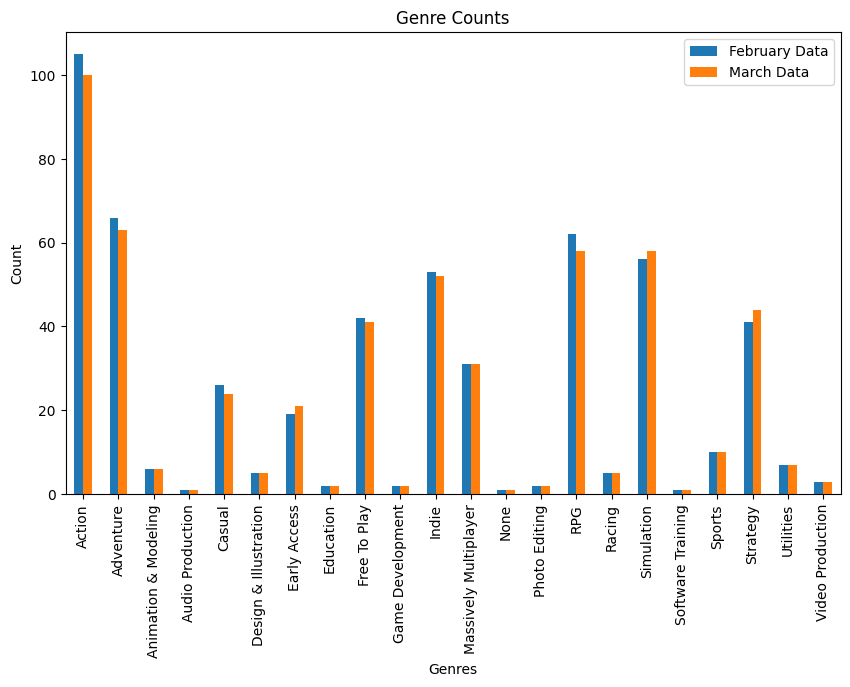

In [33]:
# Create bar plot
GenreCounts.plot(kind='bar', x='Genres', y=['February Data', 'March Data'], figsize=(10, 6))

# Labels and title
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Counts")

# Show the plot
plt.show()

In [11]:
highest_player_hours = games.sort_values(by='Player Hours', ascending=False).head(10)
highest_player_hours

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release
0,1.0,Counter-Strike 2,589411,1599759,730,671649980,"[Action, Free To Play]","Aug 21, 2012",4559.0
2,3.0,Dota 2,271976,714888,570,313409594,"[Action, Strategy, Free To Play]","Jul 9, 2013",4237.0
3,4.0,PUBG: BATTLEGROUNDS,109129,786821,578080,213853616,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2611.0
1,2.0,Marvel Rivals,296620,496193,2767030,194874053,"[Action, Free To Play]","Dec 5, 2024",70.0
7,8.0,Path of Exile 2,76585,290410,2694490,101815593,"[Action, Adventure, Massively Multiplayer, RPG...","Dec 6, 2024",69.0
9,10.0,Grand Theft Auto V,72075,211328,271590,90506929,"[Action, Adventure]","Apr 13, 2015",3594.0
5,6.0,Rust,105613,232431,252490,84456109,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2562.0
6,7.0,Banana,100867,195279,2923300,81339706,"[Adventure, Casual, Simulation, Strategy, Free...","Apr 23, 2024",296.0
30,31.0,NARAKA: BLADEPOINT,33519,223654,1203220,61037699,"[Action, Adventure, Massively Multiplayer]","Aug 11, 2021",1282.0
16,17.0,Wallpaper Engine,54712,136686,431960,60638037,"[Casual, Indie, Animation & Modeling, Design &...","Nov 16, 2018",2281.0


In [3]:
see = pd.read_csv("testing_new_functions.csv")
see.head()

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count
0,1.0,Counter-Strike 2,1110441,1783434,730,754148388,"['Action', 'Free To Play']","Aug 21, 2012",4581,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",8,"97,757",8,"8,623,762"
1,2.0,Monster Hunter Wilds,433016,1179869,2246340,52793493,"['Action', 'Adventure', 'RPG']","Feb 27, 2025",8,"['Hunting', 'Action', 'Multiplayer', 'Online C...",5,"81,275",5,"60% of 81,275) All Tim"
2,3.0,Dota 2,428618,708043,570,316204618,"['Action', 'Strategy', 'Free To Play']","Jul 9, 2013",4259,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",8,"29,831",8,"2,450,661"
3,4.0,Marvel Rivals,212988,437272,2767030,157803054,"['Action', 'Free To Play']","Dec 5, 2024",92,"['Free to Play', 'Multiplayer', 'Hero Shooter'...",6,"40,230",8,"239,004"
4,5.0,Rust,178065,232431,252490,89284465,"['Action', 'Adventure', 'Indie', 'Massively Mu...","Feb 8, 2018",2584,"['Survival', 'Crafting', 'Multiplayer', 'Open ...",8,"17,334",8,"991,942"
